<a href="https://colab.research.google.com/github/jacksone1/DataSci/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, the positive values that indicate a better model are only relative to other models. With only one model, there is no second elpd_loo value to compare to.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is putting too much information into a model to the point that it becomes less capable of accurate predictions.

**Task3**:

How do we mitigate overfitting?

We primarily mitigate overfitting through weak priors, but we can also mitigate overfitting by selecting the least amount of predictors necessary for a model to function well.

**Task4**:

How do we mitigate underfitting?

Selecting models with the best elpd_loo value helps us ensure accuracy and mitigate underfitting.

**Task5**:

Why would we want more than one predictor in a model?

More predictors gives the model more information with which to make predictions, which may lead to greater accuracy if all the predictors have significant effects in the underlying generating process.

**Task6**:

Can we have too many predictors? How would we now?

Too many predictors could lead to overfitting. The model may become distracted by excess information from predictors that have weak links to the predicted variable. We can use elpd_loo to compare models with subsets of possible predictors to one another and to the reference model with all possible predictors to determine if different models are overfitted.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of determining the best predictors from the available data. By cycling through the process of drawing causal diagrams for the set of predictors and predicted variable and comparing elpd_loo values for models with different predictors, the model with the most accurate, small set of predictors can selected.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

When its noncategorical predictor vs predicted lines are graphed, the model with added variables will have the same slope for each category line. Using categorical variable as a hierarchy or using the categorical variable's interaction will yield slopes of the same context that vary. The interaction model will have slopes able to vary more than that of the hierarchical model, since the lines in the hierarchical model are informed by an overall mean line.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

For a model with two predictors, we can make several plots of one predictor against the predicted variable, each plot corresponding to a value of the other predictor. For models with more than two predictors, there is not as easy a way of visualizing the entire model at once. elpd_loo comparison can still create a visual by which models may be compared to one another regardless of the number of predictors.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-zo6hyyh0
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-zo6hyyh0
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev2+g2c8b6e69-py3-none-any.whl size=1241889 sha256=dceb3108eb897cba8606891a98303ecfe1ae939d7915c500c1dfa20e034b7ff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-brsv_4cu/wheels/3a/ec/c0/1cda725917279b6beba2a020d6ccddfee2176b25648f4fcad8
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2024.11.0
    Uninstalling xarray-2024.11.0:
      Successfully uninstalled xarray-2024.11.0


In [3]:
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [5]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [6]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [10]:
#predictors free throw percentage and position (with position as a categorical predictor)
model_ftppc = bmb.Model("FGp ~ FTp + Pos", data=bb)
idata_ftppc = model_ftppc.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [14]:
#predictors free throw percentage and position (with position as a hierarchy)
model_ftpph = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
idata_ftpph = model_ftpph.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 52 divergences after tuning. Increase `target_accept` or reparameterize.


In [13]:
#predictors free throw percentage and position (with position interacting with frew throw percentage)
model_ftppi = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
idata_ftppi = model_ftppi.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [17]:
#predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
model_ftpp3_all_inter = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + `3PA`:Pos", data=bb)
idata_ftpp3_all_inter = model_ftpp3_all_inter.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [16]:
#predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.
model_ftpp3_p3_inter = bmb.Model("FGp ~ FTp + Pos + `3PA` + `3PA`:Pos", data=bb)
idata_ftpp3_p3_inter = model_ftpp3_p3_inter.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [20]:
comparison = az.compare({"FTp + Pos":idata_ftppc,"FTp with Pos hierarchy":idata_ftpph,"FTp + Pos with FTP:Pos interaction":idata_ftppi,"FTp + Pos + 3PA + interactions between all variables":idata_ftpp3_all_inter, "FTp + Pos + 3PA + interaction between 3PA and Pos":idata_ftpp3_p3_inter} )
comparison

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
FTp + Pos + 3PA + interaction between 3PA and Pos,0,529.667915,12.895448,0.000000,5.629543e-01,15.917316,0.000000,False,log
FTp + Pos + 3PA + interactions between all variables,1,529.000513,19.048821,0.667402,4.370457e-01,15.004879,3.682147,True,log
FTp + Pos with FTP:Pos interaction,2,509.691405,13.491965,19.976510,3.889053e-15,16.658252,7.741665,False,log
FTp with Pos hierarchy,3,508.553150,13.665220,21.114765,3.664786e-15,17.006787,7.217902,False,log
FTp + Pos,4,507.370093,8.231755,22.297822,0.000000e+00,16.032524,6.901377,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

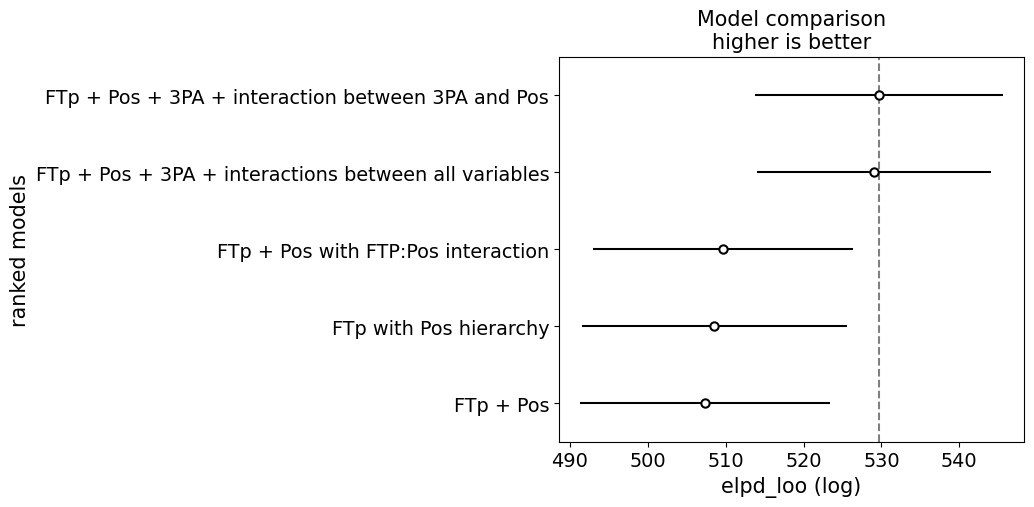

In [21]:
az.plot_compare(comparison)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to this metric, the models without 3PA perform very similarly in terms of elpd_loo and standard error, and the models with 3PA perform very similarly to each other as well. Contextually, the position of each player determines where they will be on the court to take three point attempts, and the resulting ability to make three point attempts will have a strong interaction with free throw percentage. Thus, 3PA should be more informative to FT% than just position, and this is reflected in the performance of the 3PA models.